Assignment 1
By: Christian Amstrup Peterse,
Student number: 202104742

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Variables to adjust grid size
gridWidth = 5
gridHeight = gridWidth*1.26
# fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))

# Makes grid visible on plot




# dRotatedByC = rotationByPoint([xRot[3], yRot[3]], [xRot[4],yRot[4]], 180)
# xRot[4] = dRotatedByC[0]
# yRot[4] = dRotatedByC[1]


# rot45Matrix = rotationMaxtrixByDegrees(45)

# ax.plot(xRot, yRot)

#rotationOnA = rotationFromPoint(1, x,y, 40)
#ax.plot(rotationOnA[0], rotationOnA[1])


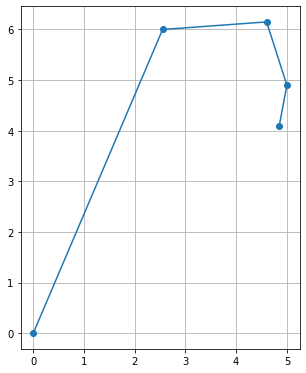

In [74]:
# Question A

# Necessary to plot function
fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
plt.grid()

x = np.array([0.0, 2.55, 4.6, 5.0, 4.85])
y = np.array([0.0, 6.0, 6.15, 4.9, 4.1])

# Added parameter for astetics
ax.plot(x,y, marker='o')

Question B: 
In the part we're asked to calculate the length of the vector OP, with respect to the joints. 
For this we have created two function. The first 'calcDist' measures the distance between 2 points, based on the formula 2.1, in 'Notesæt 02'.
The second function goes through all the points, calls 'calcDist', and accumulates the different amounts.

In [75]:
# Question B
def calcDist(start, end):
    xVal = end[0]-start[0]
    yVal = end[1]-start[1]
    return  np.sqrt(xVal**2+yVal**2)

def calcDistThroughPoints(xValues, yValues):
    # Safety check to assure all the points have both a x- and y-coordinate
    assert(len(xValues) == len(yValues))
    result = 0
    for i in range(1, len(xValues)):
        result = result + calcDist([xValues[i-1], yValues[i-1]], [xValues[i], yValues[i]])
    return result

calcDistThroughPoints(x,y)

10.70125612738532

Question C:
For question C, we're asked to clarify, that when the arm bends in joint C, it is equal to applying the rotation matrix to the vector CP.
This can be calculated by treating C as origo, and translating P with an amount equal to C's difference to [[0.0], [0.0]], and afterwards, translating P the opposite direction, by the same amount.

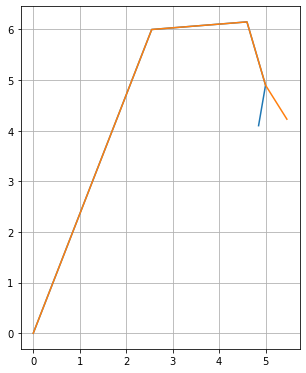

In [76]:
# Plot/grid config
fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
plt.grid()

def rotationMaxtrixByDegrees(degrees): 
    radians = np.radians(degrees)
    c, s = np.cos(radians), np.sin(radians)
    return np.array([[c, -s], [s, c]])


def rotationByPoint(origon, target, degrees):
    translated = [target[0]-origon[0], target[1]-origon[1]]
    rotTranslated = rotationMaxtrixByDegrees(degrees) @ translated 
    return [rotTranslated[0]+origon[0], rotTranslated[1]+origon[1]]

ax.plot(x,y)

# New vectors to rotate on
xRot = x.copy()
yRot = y.copy()

pRotatedByC = rotationByPoint([xRot[3], yRot[3]], [xRot[4],yRot[4]], 45)
xRot[4] = pRotatedByC[0]
yRot[4] = pRotatedByC[1]

ax.plot(xRot, yRot)

Question D:
For this question we're asked to give as solution to bending the robot arm in the joint A, and only A. Here we have constructed a function that goes through the supplied matrices, and rotates them with respect to the 'origonIndex', which in this example is A:

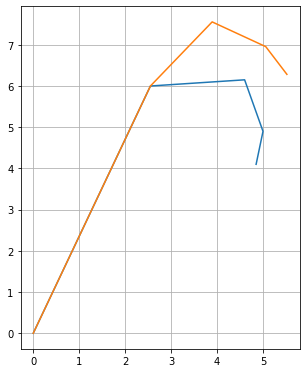

In [85]:
# Plot/grid config
fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
plt.grid()

def rotationFromPoint(origonIndex, x, y, degrees):
    assert(len(x) == len(y))
    resultX = [0.0]*len(x)
    resultY = [0.0]*len(y)
    for n in range(0, origonIndex+1):
        resultX[n] = x[n]
        resultY[n] = y[n]
    for i in range(origonIndex+1, len(x)):
        rotated = rotationByPoint([x[origonIndex], y[origonIndex]], [x[i], y[i]], degrees)

        resultX[i] = rotated[0]
        resultY[i] = rotated[1]
    return resultX, resultY

# Initial x- and y-values for refenrence
ax.plot(x,y)

rotationInA_X, rotationInA_Y = rotationFromPoint(1, x.copy(), y.copy(), 45)

ax.plot(rotationInA_X,rotationInA_Y)

Question E:
Here we would like to show that, the order you bend joints in are irrelevant, as long as the amount bend are the same. For this, we will be reusing the function 'rotationFromPoint', from question D:

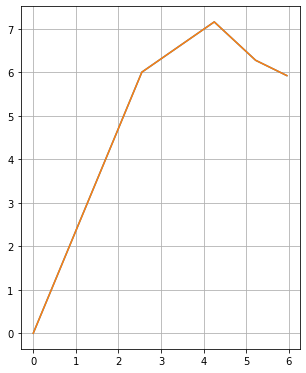

In [89]:
# Plot/grid config
fig, ax = plt.subplots(figsize=(gridWidth,gridHeight))
plt.grid()

# Amount of degrees to rotate on their respective turn
degreesOnRotationA = 30
degreesOnRotationC = 45

# Values for rotation on A, then C
x_AC_rotNone = x.copy()
y_AC_rotNone = y.copy()

x_AC_rotA, y_AC_rotA = rotationFromPoint(1, x_AC_rotNone, y_AC_rotNone, degreesOnRotationA)
x_AC_rotAC, y_AC_rotAC = rotationFromPoint(3, x_AC_rotA, y_AC_rotA, degreesOnRotationC)

# Values for rotation on C, then A
x_CA_rotNone = x.copy()
y_CA_rotNone = y.copy()

x_CA_rotC, y_CA_rotC = rotationFromPoint(3, x_CA_rotNone, y_CA_rotNone, degreesOnRotationC)
x_CA_rotCA, y_CA_rotCA = rotationFromPoint(1, x_CA_rotC, y_CA_rotC, degreesOnRotationA)

ax.plot(x_AC_rotAC,y_AC_rotAC)
ax.plot(x_CA_rotCA,y_CA_rotCA)